In [1]:
import gym
import highway_env
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN

env = gym.make('ma-highway-v0')


c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\wrappe

(array([[ 1.        ,  1.        ,  0.6666667 ,  0.3125    ,  0.        ],
       [ 1.        ,  0.10451003, -0.33333334, -0.02887931,  0.        ],
       [ 1.        ,  0.23779099, -0.6666667 , -0.03699712,  0.        ],
       [ 1.        ,  0.36057743,  0.        , -0.05333721,  0.        ],
       [ 1.        ,  0.48616242, -0.6666667 , -0.02385702,  0.        ]],
      dtype=float32), 4.0, False, {'speed': 25.0, 'crashed': False, 'action': 1, 'rewards': {'~collision_penalty': 1, '~lane change penalty': 0, '~sudden aceleration penalty': 0, '~target speed reward': 1, '~target lane reward': 1, 'on_road_reward': 1.0}})


In [11]:
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))


The observation space: Box(-inf, inf, (5, 5), float32)
The action space: Discrete(5)


In [3]:
from pprint import pprint as pp

pp(env.observation_space.sample())

array([[-0.24781735, -0.89376765,  0.5502368 ,  0.386194  , -0.23347892],
       [-1.1975341 , -0.8934713 , -1.0350403 , -0.30027187,  0.33148178],
       [-0.0183775 ,  2.9464455 , -0.7097694 , -1.6262903 ,  0.78689456],
       [-1.5658585 ,  0.4565787 ,  0.20267242, -0.88431674, -2.4059784 ],
       [-0.82652104,  0.69788367,  0.47182578,  0.19536518, -0.35112184]],
      dtype=float32)


c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:52: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:298: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  "No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps."


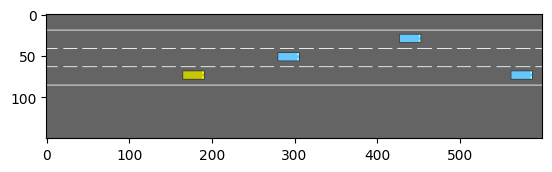

In [4]:
import matplotlib.pyplot as plt 

env_screen = env.render(mode = 'rgb_array')
env.close()
plt.imshow(env_screen)

In [10]:
env.configure({'simulation_frequency':20, 'show_trajectories':False, 'initial_lane_id':1, 'duration':10, 'vehicles_density':1, 'ego_spacing':1})


for trials in range(10):
        done = False
        obs = env.reset()
        while not done:
            # Predict
            random_action = env.action_space.sample()
            # Get reward
            obs, reward, done, info = env.step(random_action)
            # Render
            env.render()
env.close()

In [14]:
from pprint import pprint


for i in range(10):
    action = env.action_space.sample()
    obs, reward, terminated, info = env.step(action)
    pprint([obs, reward, terminated, info])


[array([[ 1.0000000e+00,  1.0000000e+00,  6.6666669e-01,  2.4969254e-01,
         4.8077764e-11],
       [ 1.0000000e+00,  9.7593823e-03, -3.3333334e-01,  5.8310926e-03,
        -5.4176885e-11],
       [ 1.0000000e+00,  2.5000000e-02, -1.6314361e-10, -2.4297187e-01,
        -4.8077764e-11],
       [ 1.0000000e+00,  3.6027530e-01, -5.7516780e-10, -2.2051435e-02,
        -4.8077764e-11],
       [ 1.0000000e+00,  4.3860507e-01, -6.6666669e-01,  3.3753812e-02,
        -4.8077764e-11]], dtype=float32),
 1.0,
 True,
 {'TimeLimit.truncated': False,
  'action': 1,
  'crashed': True,
  'rewards': {'on_road_reward': 1.0,
              '~collision_penalty': -1,
              '~lane change penalty': 0,
              '~sudden aceleration penalty': 0,
              '~target lane reward': 1,
              '~target speed reward': 0},
  'speed': 19.975403806219123}]
[array([[ 1.0000000e+00,  1.0000000e+00,  6.6666669e-01,  2.4988978e-01,
         4.8115734e-11],
       [ 1.0000000e+00,  2.5000000e-02, 

In [1]:
TRAIN = True

# Create the model
model = DQN('MlpPolicy', env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=5e-4,
            buffer_size=15000,
            learning_starts=200,
            batch_size=32,
            gamma=0.8,
            train_freq=1,
            gradient_steps=1,
            target_update_interval=50,
            verbose=1,
            tensorboard_log="highway_dqn/")

# Train the model
if TRAIN:
    model.learn(total_timesteps=int(2e4))
    model.save("highway_dqn/model")
    #del model

c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\torch\utils\tensorboard\__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  tensorboard.__version__
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to proper